In [2]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
import pandas as pd

df=pd.read_csv("BASE.csv")

In [4]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'amenities', 'has_availability', 'first_review',
       'last_review', 'instant_bookable', 'host_id', 'latitude', 'longitude',
       'host_response_rate', 'host_acceptance_rate', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       '

In [5]:
df.select_dtypes(include=['number']).columns


Index(['host_listings_count', 'host_total_listings_count', 'host_id',
       'latitude', 'longitude', 'host_response_rate', 'host_acceptance_rate',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy',
       'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entir

1. HOST RESPONSE RATE

In [6]:
#CORRELACIÓN LINEAL
R2 = abs(df["host_response_rate"].corr(df["accommodates"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.25895661321731217)

MODELO1 = FUNCIÓN POLINOMIAL INVERSA

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/1804777484.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/1804777484.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red")


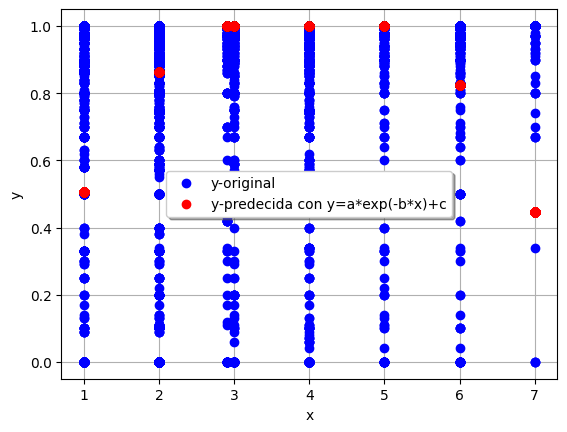

0.8242402691618114
0.9078767918400664


In [7]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['accommodates']]
Var_Dep= df['host_response_rate']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a/b*x**2 + c*x
parametros, covs = curve_fit(func, df['accommodates'], df['host_response_rate'])
y_pred = func(x, *parametros)
y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_HOSTRESPONSERATE = abs(r2_score(y, y_pred))
R_HOSTRESPONSERATE = np.sqrt(R2_HOSTRESPONSERATE)
print(R2_HOSTRESPONSERATE)
print(R_HOSTRESPONSERATE)


MODELO2 = LOGARÍTMICO

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/3751848157.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/3751848157.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red")


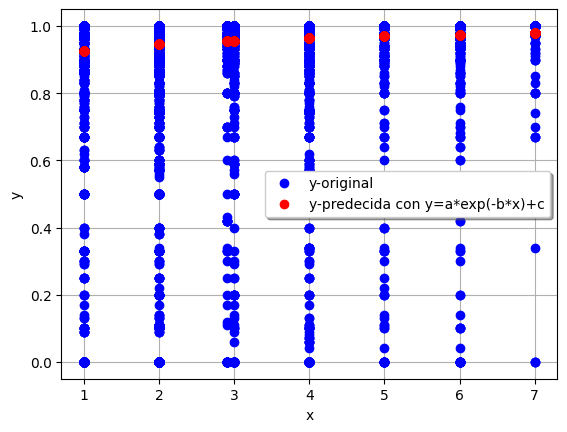

0.005463909248506815
0.0739182605890237


In [8]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['accommodates']]
Var_Dep= df['host_response_rate']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a*np.log(x) + b + c
parametros, covs = curve_fit(func, df['accommodates'], df['host_response_rate'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

In [9]:
import pandas as pd

resultados = pd.DataFrame({
    "Modelo": ["Host Response Rate: Lineal", "Host Response Rate: Función Polinomial Inversa", "Host Response Rate: Logarítmica",],
    "R2": [R2, R2_HOSTRESPONSERATE, R21],
    "Correlación (r)": [R, R_HOSTRESPONSERATE, R1]
})
resultados

,Modelo,R2,Correlación (r)
0,Host Response Rate: Lineal,0.067059,0.258957
1,Host Response Rate: Función Polinomial Inversa,0.824240,0.907877
2,Host Response Rate: Logarítmica,0.005464,0.073918


2. HOST ACCEPTANCE RATE

In [10]:
#CORRELACIÓN LINEAL
R2 = abs(df["bathrooms"].corr(df["host_acceptance_rate"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.12425994176449019)

MODELO 1 = FUNCIÓN POLINÓMICA DE SENGO GRADO

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/1678123411.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/1678123411.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*sin(x)+b", color= "red")


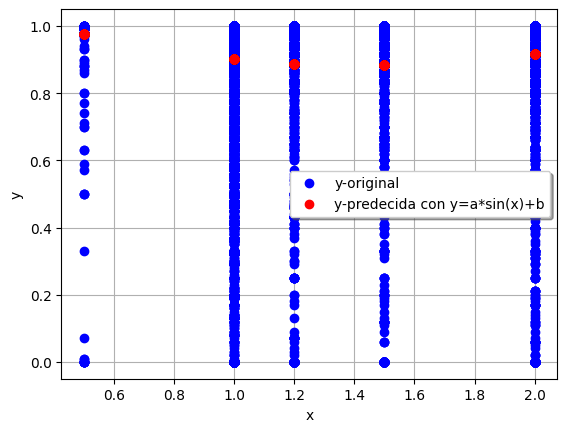

0.0017007639422254028
0.041240319375889935


In [11]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bathrooms']]
Var_Dep= df['host_acceptance_rate']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a*x**2 + b*x + c
parametros, covs = curve_fit(func, df['bathrooms'], df['host_acceptance_rate'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*sin(x)+b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)


MODELO 2 = FUNCIÓN EXPONENCIAL

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/914474219.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/914474219.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*sin(x)+b", color= "red")


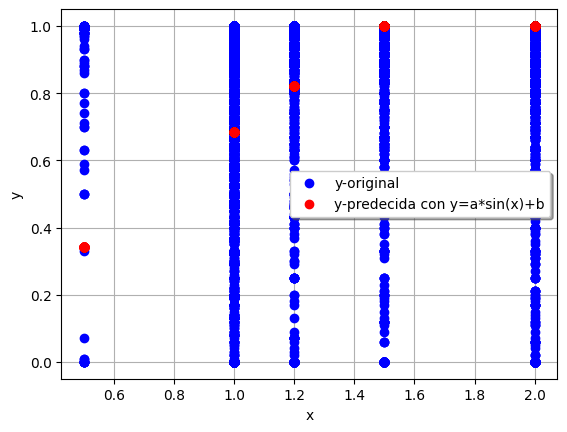

0.6720031182218478
0.8197579631951419


In [12]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bathrooms']]
Var_Dep= df['host_acceptance_rate']
x= Vars_Indep
y= Var_Dep
def func(x, a):
    return 1/a*x
parametros, covs = curve_fit(func, df['bathrooms'], df['host_acceptance_rate'])
y_pred = func(x, *parametros)
y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*sin(x)+b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_HOST_ACCEPTANCE_RATE = abs(r2_score(y, y_pred))
R_HOST_ACCEPTANCE_RATE = np.sqrt(R2_HOST_ACCEPTANCE_RATE)
print(R2_HOST_ACCEPTANCE_RATE)
print(R_HOST_ACCEPTANCE_RATE)

In [13]:
resultados = pd.DataFrame({
    "Modelo": ["Host Acceptance Rate: Lineal", "Host Acceptance Rate: Función Polinómica de Segundo grado", "Host Acceptance Rate: Función exponencial",],
    "R2": [R2, R21, R2_HOST_ACCEPTANCE_RATE],
    "Correlación (r)": [R, R1, R_HOST_ACCEPTANCE_RATE]
})
resultados

,Modelo,R2,Correlación (r)
0,Host Acceptance Rate: Lineal,0.015441,0.124260
1,Host Acceptance Rate: Función Polinómica de Se...,0.001701,0.041240
2,Host Acceptance Rate: Función exponencial,0.672003,0.819758


3. HOST TOTAL LISTINGS COUNT

In [14]:
#CORRELACIÓN LINEAL
R2 = abs(df["host_total_listings_count"].corr(df["availability_30"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.039053665635532656)

MODELO 1 : FUNCIÓN INVERSA

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/1024727067.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/1024727067.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*sin(x)+b", color= "red")


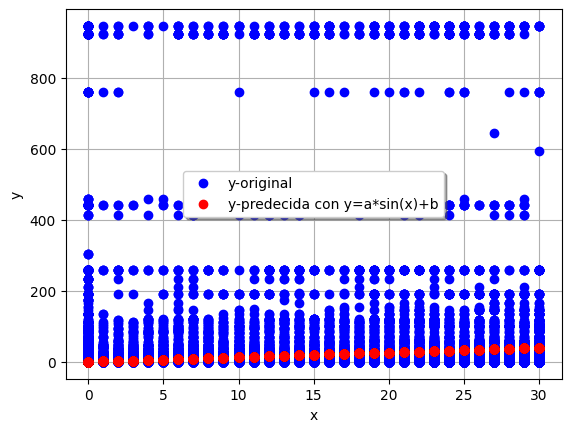

0.02805976325500792
0.16751048700009177


In [15]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['availability_30']]
Var_Dep= df['host_total_listings_count']
x= Vars_Indep
y= Var_Dep
def func(x, a):
    return 1/a*x
parametros, covs = curve_fit(func, df['availability_30'], df['host_total_listings_count'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*sin(x)+b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

MODELO 2 : POLINOMIO DE GRADO 4

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/3388260366.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs = curve_fit(func, df['availability_30'], df['host_total_listings_count'])
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/3388260366.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/3388260366.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*sin(x)+b", color= "red")


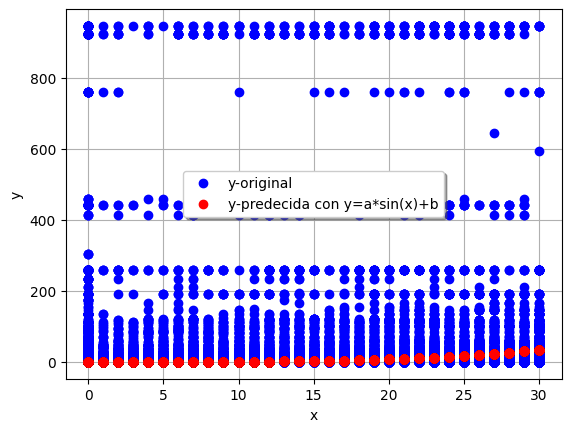

0.05601778089091969
0.23668075733130417


In [16]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['availability_30']]
Var_Dep= df['host_total_listings_count']
x= Vars_Indep
y= Var_Dep
def func(x, a, b):
    return 1/a*x**4
parametros, covs = curve_fit(func, df['availability_30'], df['host_total_listings_count'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*sin(x)+b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_HOSTTOTALLISTINGCOUNT = abs(r2_score(y, y_pred))
R_HOSTTOTALLISTINGCOUNT = np.sqrt(R2_HOSTTOTALLISTINGCOUNT)
print(R2_HOSTTOTALLISTINGCOUNT)
print(R_HOSTTOTALLISTINGCOUNT)

In [17]:
resultados = pd.DataFrame({
    "Modelo": ["Host Total Listings Count: Lineal", "Host Total Listings Count: Función Inversa", "Host Total Listings Count: Polinomio de grado 4",],
    "R2": [R2, R21, R2_HOSTTOTALLISTINGCOUNT ],
    "Correlación (r)": [R, R1, R_HOSTTOTALLISTINGCOUNT ]
})
resultados

,Modelo,R2,Correlación (r)
0,Host Total Listings Count: Lineal,0.001525,0.039054
1,Host Total Listings Count: Función Inversa,0.028060,0.167510
2,Host Total Listings Count: Polinomio de grado 4,0.056018,0.236681


4. ACCOMODATES

In [18]:
#CORRELACIÓN LINEAL
R2 = abs(df["accommodates"].corr(df["availability_365"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.14107992984684156)

MODELO1 = FUNCIÓN INVERSA

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/4116161274.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/4116161274.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=1/a*x", color= "red")


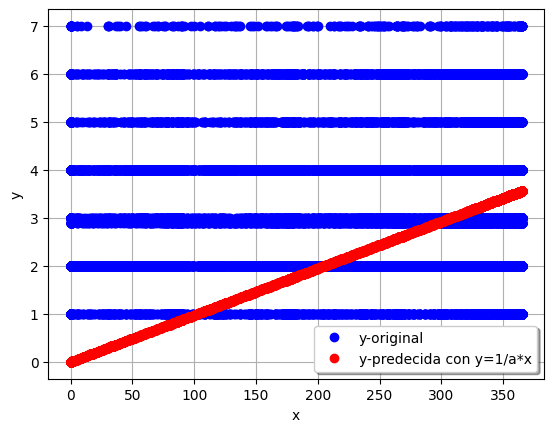

0.9583162669998009
0.9789362936370277


In [19]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['availability_365']]
Var_Dep= df['accommodates']
x= Vars_Indep
y= Var_Dep
def func(x, a):
    return 1/a*x
parametros, covs = curve_fit(func, df['availability_365'], df['accommodates'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=1/a*x", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_ACCOMODATES = abs(r2_score(y, y_pred))
R_ACCOMODATES = np.sqrt(R2_ACCOMODATES)
print(R2_ACCOMODATES)
print(R_ACCOMODATES)

MODELO2 = FUNCIÓN CUADRÁTICA INVERSA

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/376540182.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs = curve_fit(func, df['availability_365'], df['accommodates'])
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/376540182.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/376540182.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red")


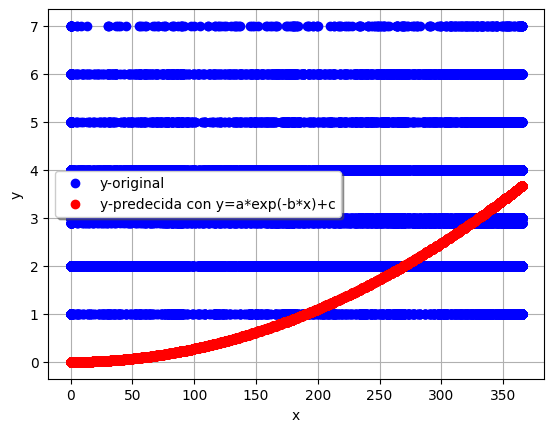

1.481825498149889
1.217302549964424


In [20]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['availability_365']]
Var_Dep= df['accommodates']
x= Vars_Indep
y= Var_Dep
def func(x, a, b):
    return 1/a*x**2
parametros, covs = curve_fit(func, df['availability_365'], df['accommodates'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

In [21]:
resultados = pd.DataFrame({
    "Modelo": ["Accomodates: Lineal", "Accomodates: Función Inversa", "Accomodates: Función Cuadrática Inversa",],
    "R2": [R2, R2_ACCOMODATES, R21 ],
    "Correlación (r)": [R, R_ACCOMODATES, R1 ]
})
resultados

,Modelo,R2,Correlación (r)
0,Accomodates: Lineal,0.019904,0.141080
1,Accomodates: Función Inversa,0.958316,0.978936
2,Accomodates: Función Cuadrática Inversa,1.481825,1.217303


5. REVIEWS PER MONTH

In [22]:
#CORRELACIÓN LINEAL
R2 = abs(df["reviews_per_month"].corr(df["bedrooms"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.2782226923335019)

MODELO 1 = FUNCIÓN POLINOMIAL INVERSA

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/1601983810.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/1601983810.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= a/b*x**2 + c*x ", color= "red")


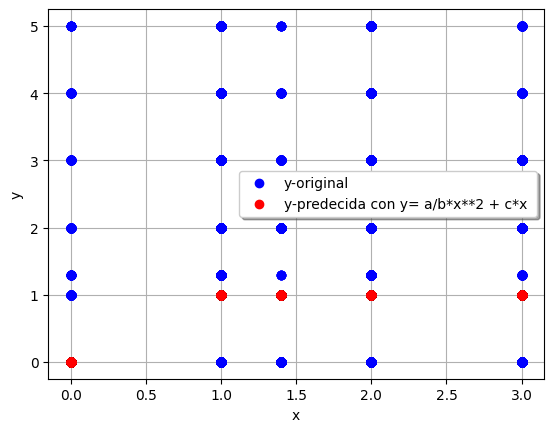

0.0652551507490915
0.2554508773699779


In [23]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bedrooms']]
Var_Dep= df['reviews_per_month']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a/b*x**2 + c*x
parametros, covs = curve_fit(func, df['bedrooms'], df['reviews_per_month'])
y_pred = func(x, *parametros)
y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= a/b*x**2 + c*x ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

MODELO 2: FUNCIÓN POLINÓMICA DE GRADO 4

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/429545809.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs = curve_fit(func, df['bedrooms'], df['reviews_per_month'])
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/429545809.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/429545809.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= 1/a*x**4 ", color= "red")


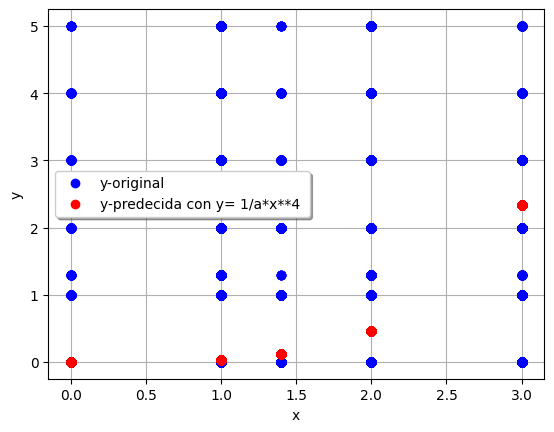

0.6712632967584453
0.8193065950902906


In [24]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bedrooms']]
Var_Dep= df['reviews_per_month']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return 1/a*x**4
parametros, covs = curve_fit(func, df['bedrooms'], df['reviews_per_month'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= 1/a*x**4 ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_REVIEWSPERMONTH = abs(r2_score(y, y_pred))
R_REVIEWSPERMONTH = np.sqrt(R2_REVIEWSPERMONTH)
print(R2_REVIEWSPERMONTH)
print(R_REVIEWSPERMONTH)

In [25]:
resultados = pd.DataFrame({
    "Modelo": ["Reviews per month: Lineal", "Reviews per month: Función Polinomial Inversa", "Reviews per month: Función Polinómica de Grado 4",],
    "R2": [R2, R21, R2_REVIEWSPERMONTH ],
    "Correlación (r)": [R, R1, R_REVIEWSPERMONTH ]
})
resultados

,Modelo,R2,Correlación (r)
0,Reviews per month: Lineal,0.077408,0.278223
1,Reviews per month: Función Polinomial Inversa,0.065255,0.255451
2,Reviews per month: Función Polinómica de Grado 4,0.671263,0.819307


6. PRICE

In [26]:
#CORRELACIÓN LINEAL
R2 = abs(df["host_response_rate"].corr(df["price"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.26264096582771407)

MODELO 1 = FUNCIÓN COCIENTE ENTRE POLINOMIOS DE GRADO 6

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/2124000124.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/2124000124.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= (a*x**2 + b)/ c*x**4", color= "red")


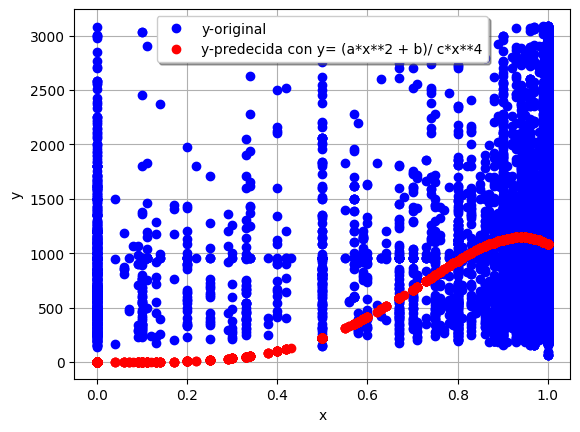

0.09252760169530783
0.3041835000379012


In [27]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_response_rate']]
Var_Dep= df['price']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return (a*x**2 + b)/ c*x**4
parametros, covs = curve_fit(func, df['host_response_rate'], df['price'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= (a*x**2 + b)/ c*x**4", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

MODELO 2: FUNCIÓN EXPONENCIAL

/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/3515829646.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs = curve_fit(func, df['host_response_rate'], df['price'])
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/3515829646.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/9j/wm9ykq0j7ql95x8sql60c0680000gn/T/ipykernel_21987/3515829646.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= 1/a**x", color= "red")


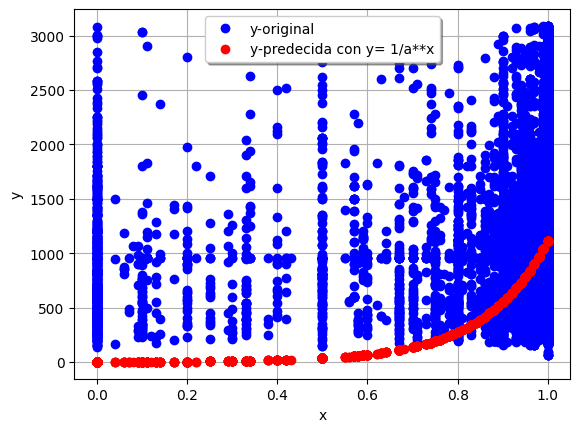

0.16938279854136207
0.4115614152728145


In [30]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_response_rate']]
Var_Dep= df['price']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return 1/a**x
parametros, covs = curve_fit(func, df['host_response_rate'], df['price'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= 1/a**x", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_PRICE = abs(r2_score(y, y_pred))
R_PRICE = np.sqrt(R2_PRICE)
print(R2_PRICE)
print(R_PRICE)

In [29]:
resultados = pd.DataFrame({
    "Modelo": ["Price: Lineal", "Price: Función Cociente entre Polinomios Grado 6", "Price: Función Exponencial Decreciente",],
    "R2": [R2, R21, R2_PRICE ],
    "Correlación (r)": [R, R1, R_PRICE ]
})
resultados

,Modelo,R2,Correlación (r)
0,Price: Lineal,0.068980,0.262641
1,Price: Función Cociente entre Polinomios Grado 6,0.092528,0.304184
2,Price: Función Exponencial Decreciente,0.169383,0.411561
